In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
import logging

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

In [2]:
b = pd.read_pickle('shear_rate_10k')
c = pd.read_pickle('shear_rate_20k')
d = pd.read_pickle('shear_rate_25k')
e = pd.read_pickle('shear_rate_30k')
f = pd.read_pickle('shear_rate_40k')
g = pd.read_pickle('shear_rate_50k')
h = pd.read_pickle('shear_rate_90k')
X=b
for i in [c,d,e,f,g,h]:
    X=X.append(i)

In [3]:
y = X[['shear rate']].values.ravel()
#print(y)
X=X.drop(columns=['shear rate'])
#print(X)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

In [5]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
label=le.fit_transform(y_train)

label

array([6, 4, 6, ..., 6, 6, 3], dtype=int64)

In [6]:
import sklearn.preprocessing as pre

x_scaler = pre.StandardScaler()
scaled_x = x_scaler.fit_transform(X_train)

In [7]:
# Train a SVM classification model

print("Fitting the classifier to the training set")
#t0 = time()
#param_grid = {'C': [5e2, 1e3, 5e3, 1e4, 5e4],
#              'gamma': [0.001, 0.005, 0.01, 0.05, 0.1], }
#clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'),
#                  param_grid, iid=False)
#clf = clf.fit(scaled_x, label)
#print("done in %0.3fs" % (time() - t0))
#print("Best estimator found by grid search:")
#print(clf.best_estimator_)

clf = SVC(C=1e4, gamma=1e-2)
clf = clf.fit(scaled_x, label)

Fitting the classifier to the training set


In [8]:
print("Predicting shear rate on the test set")
t0 = time()
y_pred = clf.predict(x_scaler.transform(X_test))
print("done in %0.3fs" % (time() - t0))

print(classification_report(le.transform(y_test), y_pred))

Predicting shear rate on the test set
done in 0.085s
              precision    recall  f1-score   support

           0       0.58      0.21      0.31       167
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00        18
           3       0.00      0.00      0.00       106
           4       0.51      0.67      0.58       233
           5       0.35      0.21      0.26       141
           6       0.71      0.96      0.81       642

    accuracy                           0.63      1318
   macro avg       0.31      0.29      0.28      1318
weighted avg       0.55      0.63      0.57      1318



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


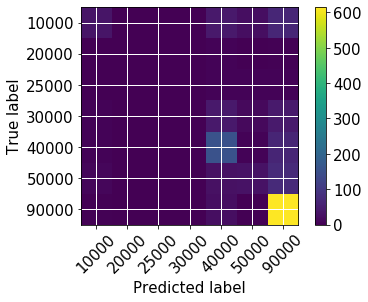

In [19]:
cm = confusion_matrix(le.transform(y_test), y_pred)

shear_rate=np.array([10000,20000,25000,30000,40000,50000,90000])

plt.rcParams.update({'font.size': 15})
fig=plt.imshow(cm, interpolation='nearest', cmap=plt.cm.viridis)
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(shear_rate))
plt.xticks(tick_marks, shear_rate, rotation=45)
plt.yticks(tick_marks, shear_rate)
plt.grid(color='w', linestyle='-', linewidth=1)
plt.colorbar()

plt.savefig('SVC_.png',bbox_inches='tight')
plt.show()

In [10]:
np.sum(le.transform(y_test)== y_pred)

835

In [11]:
np.sum(le.transform(y_test)!= y_pred)

483

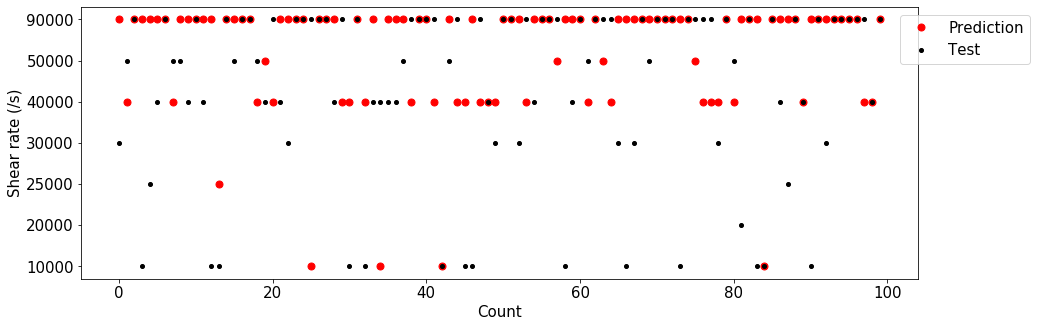

In [13]:
import random
a=np.random.choice(y_pred, size=100)
b=np.random.choice(le.transform(y_test), size=100) 

plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(15,5))
plt.plot(a, 'o', color='red', markersize=7, label='Prediction')
plt.plot(b, 'o', color='black', markersize=4, label='Test')
plt.legend(bbox_to_anchor=(0.97, 1.0))
plt.xlabel('Count')
plt.ylabel('Shear rate (/s)')
plt.yticks(tick_marks, shear_rate)
plt.savefig('SVC.png',bbox_inches='tight')